In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [6]:
# LOad the dataset
df = pd.read_csv('../data/raw_analyst_ratings.csv/raw_analyst_ratings.csv')
# Display basic information about the dataset
df.info()

# Show first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [7]:
# Shape of the dataset
print(f"Dataset shape: {df.shape}")

Dataset shape: (1407328, 6)


In [8]:
# Descriptive statistics
df['headline_length'] = df['headline'].astype(str).apply(len)

# Summary statistics
df['headline_length'].describe()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

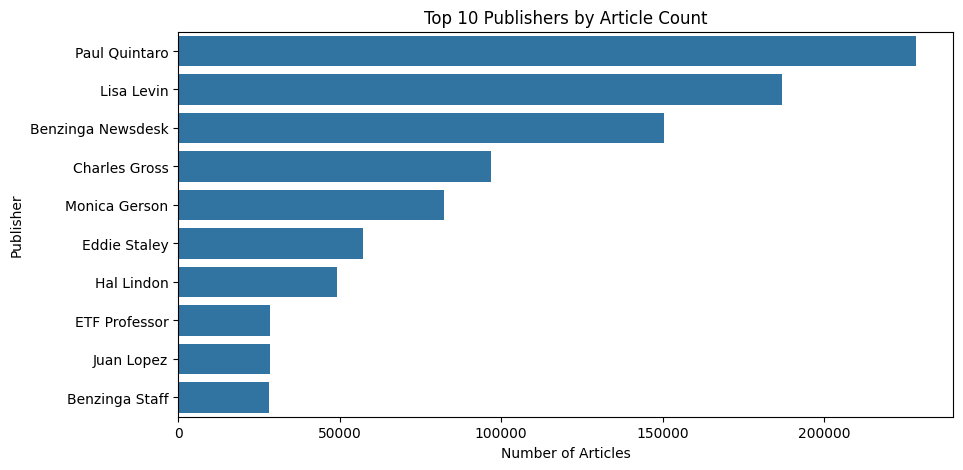

In [9]:
# Number of articles per publisher
publisher_counts = df['publisher'].value_counts()
top_publishers = publisher_counts.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title("Top 10 Publishers by Article Count")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.show()


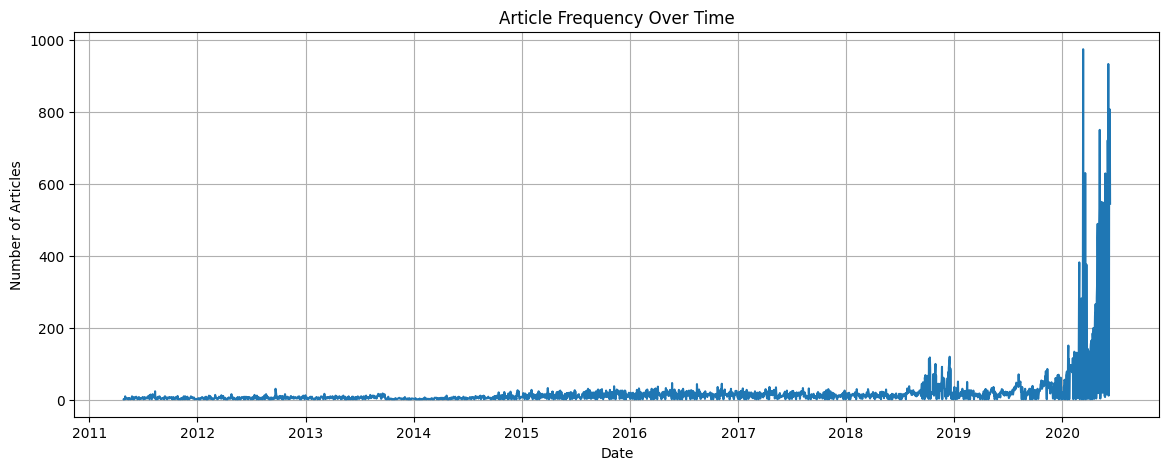

In [10]:
# Articles over time
df['date'] = pd.to_datetime(df['date'], errors='coerce')

articles_per_day = df.groupby(df['date'].dt.date).size()

plt.figure(figsize=(14, 5))
articles_per_day.plot()
plt.title("Article Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()


In [ ]:
# Topic modeling
# Drop NA headlines
text_data = df['headline'].dropna().astype(str)

# Create a document-term matrix
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english', max_features=1000)
X = vectorizer.fit_transform(text_data)

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Show top 10 words in each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

print_top_words(lda, vectorizer.get_feature_names_out(), 10)
